In [63]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
data = pd.read_csv('churn.csv')

In [64]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(0)
data_for_corr=data.copy()

In [65]:
# this will help me see the dependencies
data_for_corr = data_for_corr.drop('customerID', axis=1)
# preapration for correlation
label_encoder = LabelEncoder()
for i in data_for_corr.columns:
    if data_for_corr[i].dtype == 'object':
        data_for_corr[i] = label_encoder.fit_transform(data_for_corr[i])
matrix = data_for_corr.corr()
target_corr = matrix['Churn'].sort_values(ascending=False)
target_corr


Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.198324
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

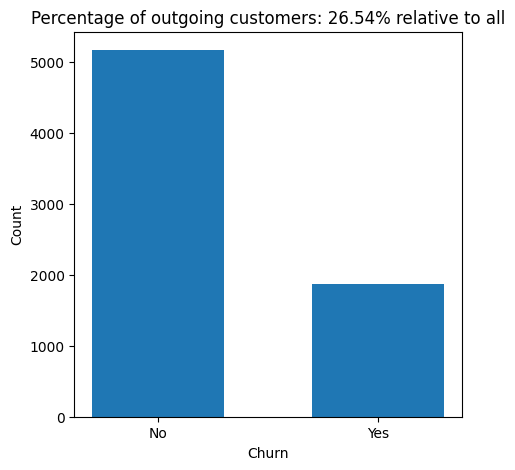

In [66]:
y = pd.Series(data['Churn'])
class_counts = y.value_counts()
plt.figure(figsize=(5, 5))
plt.bar(class_counts.index, class_counts.values, width=0.6)
plt.xlabel('Churn')
plt.ylabel('Count')
percent = (class_counts[1] / (class_counts[0] + class_counts[1])) * 100
plt.title(f'Percentage of outgoing customers: {percent:.2f}% relative to all')
plt.xticks(rotation=360)
plt.show()


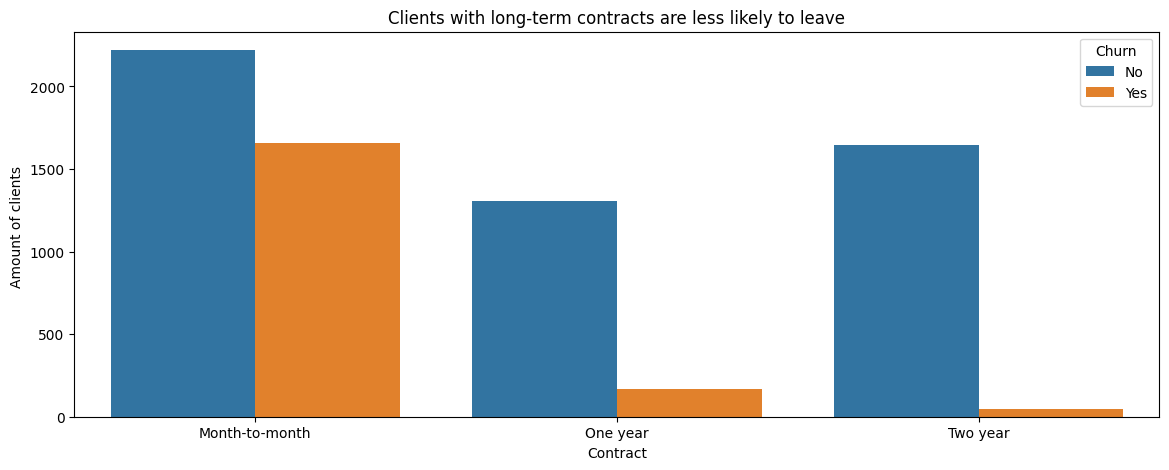

In [67]:
plt.figure(figsize=(14,5))
sns.countplot(x=data['Contract'],hue=data['Churn'])
plt.title('Clients with long-term contracts are less likely to leave')
plt.ylabel('Amount of clients ')
plt.show()


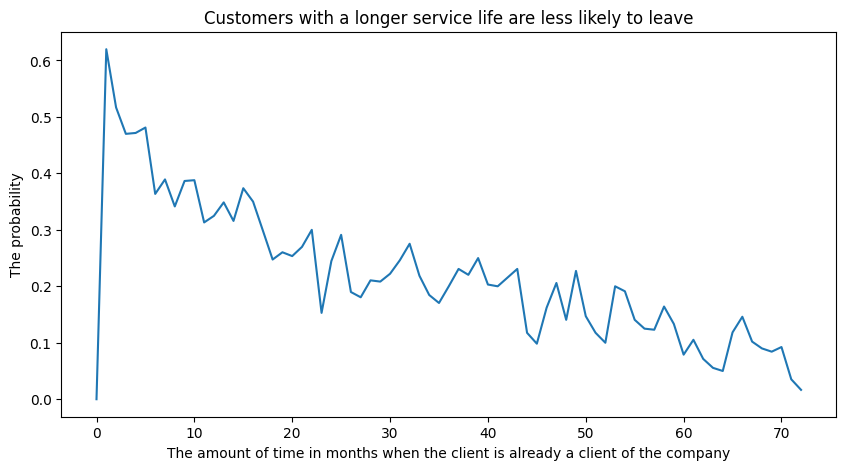

In [68]:
tenure_churn = data_for_corr.groupby('tenure')['Churn'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='tenure', y='Churn', data=tenure_churn)
plt.title('Customers with a longer service life are less likely to leave')
plt.xlabel(
    'The amount of time in months when the client is already a client of the company')
plt.ylabel('The probability')
plt.show()


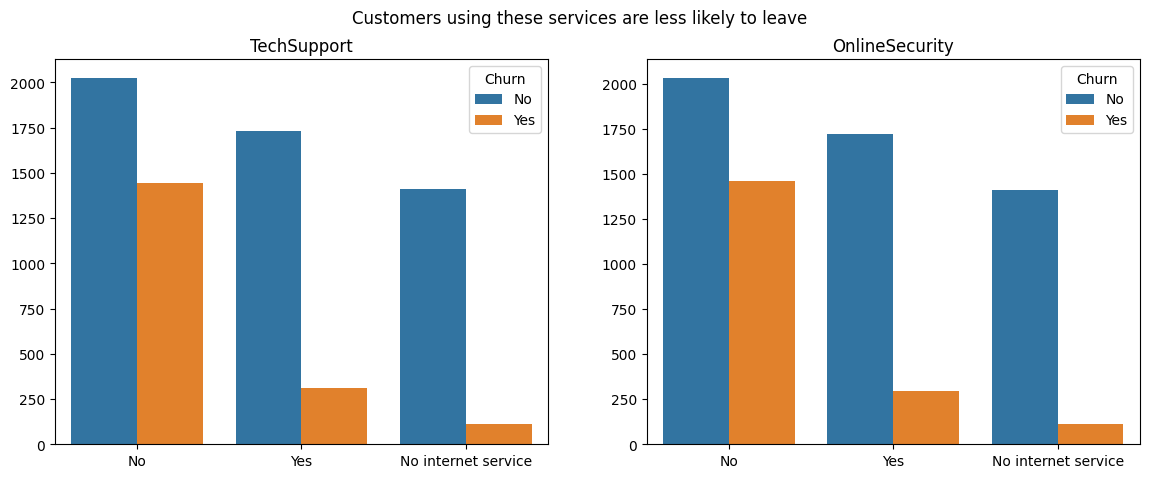

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(x=data['TechSupport'], hue=data['Churn'], ax=axes[0])
axes[0].set_title('TechSupport')
axes[0].set_ylabel('')
axes[0].set_xlabel('')
sns.countplot(x=data['OnlineSecurity'], hue=data['Churn'], ax=axes[1])
axes[1].set_title('OnlineSecurity')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
plt.suptitle('Customers using these services are less likely to leave')
plt.show()


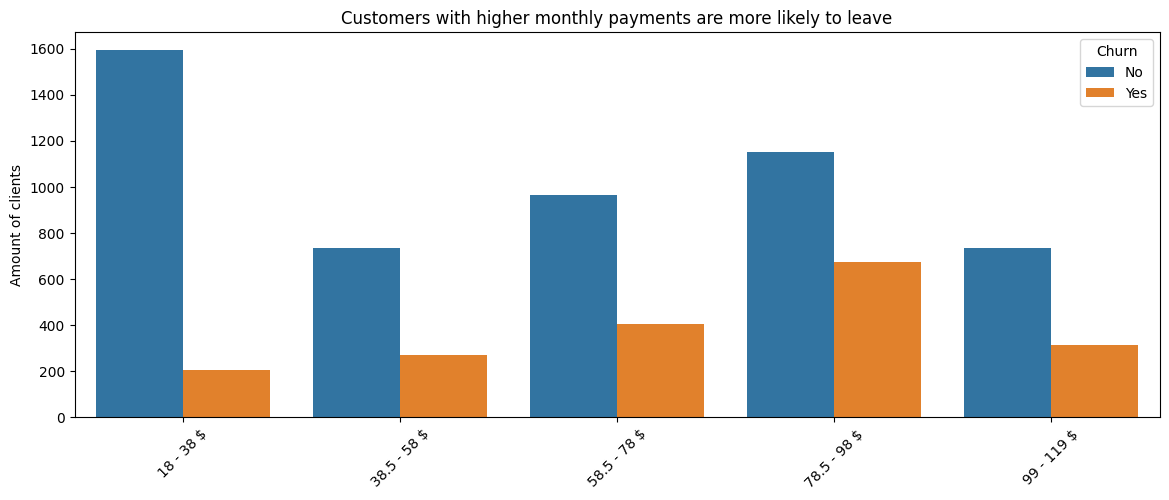

In [70]:
# first I need to find the ranges of monthly charges
data_cop = data_for_corr.copy()
data_cop['MonthlyChargesCategory'] = pd.cut(data_cop['MonthlyCharges'], bins=5, labels=[
    '18 - 38 $', '38.5 - 58 $', '58.5 - 78 $', '78.5 - 98 $', '99 - 119 $'])
summary_table = data_cop.groupby('MonthlyChargesCategory').agg(
    {'MonthlyCharges': ['min', 'max']})
summary_table.columns = ['from', 'to']
summary_table
MonthlyCharges = data_cop.groupby('MonthlyCharges')[
    'Churn'].mean().reset_index()
data_cop['Churn'] = label_encoder.inverse_transform(data_cop['Churn'])

plt.figure(figsize=(14, 5))
sns.countplot(x=data_cop['MonthlyChargesCategory'],
              hue=data_cop['Churn'], data=data_cop)
plt.title('Customers with higher monthly payments are more likely to leave')
plt.ylabel('Amount of clients')
plt.xticks(rotation=45)
plt.xlabel('')
plt.show()


Text(0.5, 0, '')

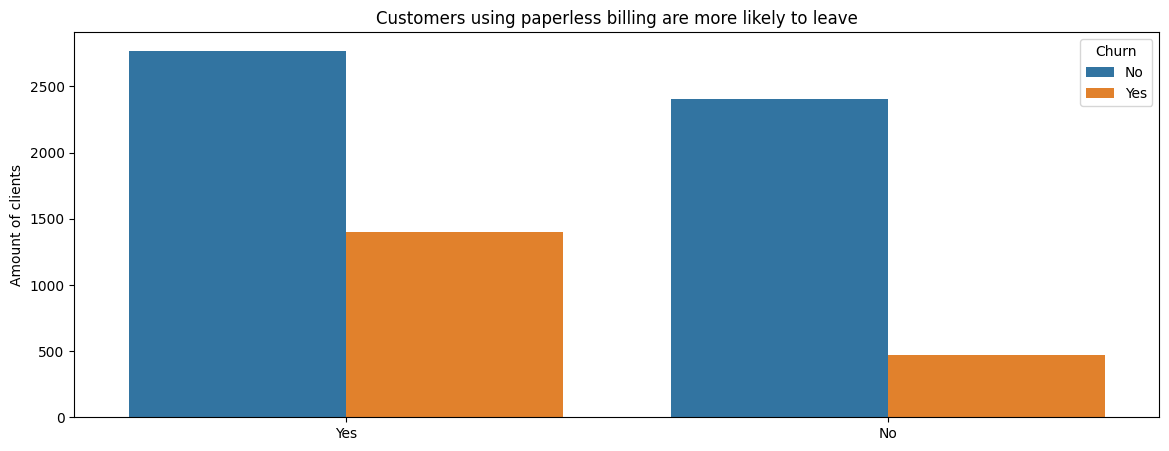

In [71]:
plt.figure(figsize=(14, 5))
sns.countplot(x=data['PaperlessBilling'], hue=data['Churn'])
plt.title('Customers using paperless billing are more likely to leave')
plt.ylabel('Amount of clients')
plt.xlabel('')


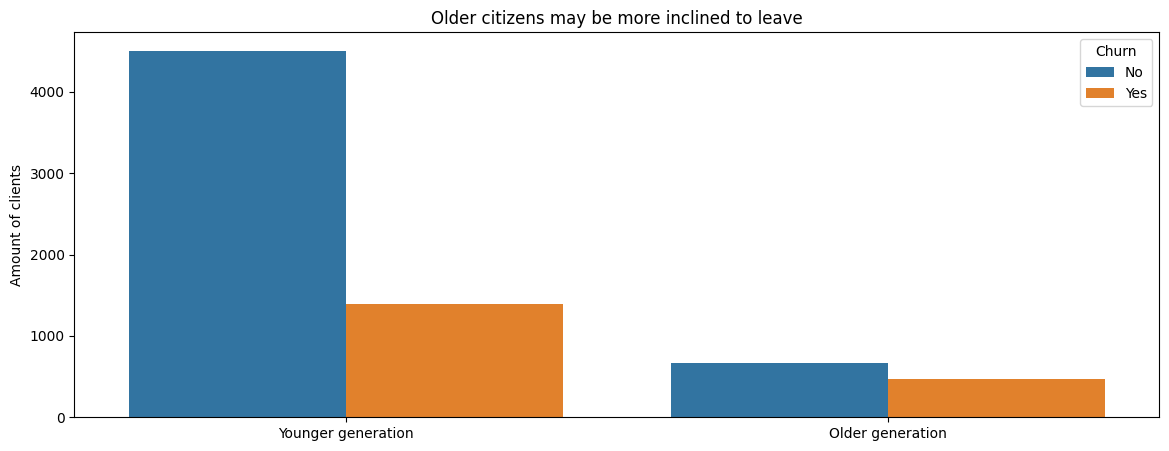

In [72]:
data['SeniorCitizen'] = data['SeniorCitizen'].map(
    {0: 'Younger generation', 1: 'Older generation'})
plt.figure(figsize=(14, 5))
sns.countplot(x=data['SeniorCitizen'], hue=data['Churn'])
plt.title('Older citizens may be more inclined to leave')
plt.ylabel('Amount of clients')
plt.xlabel('')
plt.show()


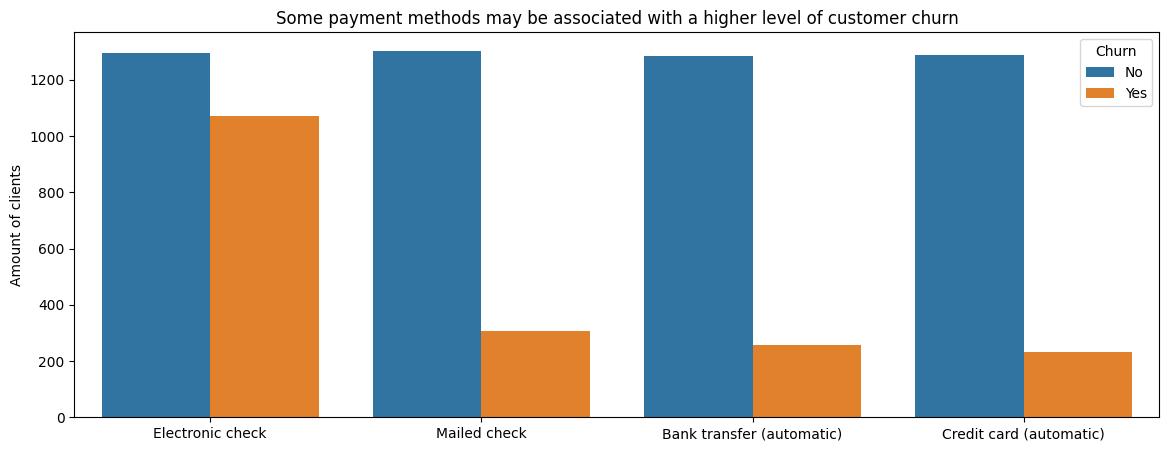

In [73]:
plt.figure(figsize=(14, 5))
sns.countplot(x=data['PaymentMethod'], hue=data['Churn'])
plt.title(
    'Some payment methods may be associated with a higher level of customer churn')
plt.ylabel('Amount of clients')
plt.xlabel('')
plt.show()
